# OpenAI API 강의 4
## 주제: 이미지·음성 API 활용


## 학습 목표
- OpenAI Image API를 활용하여 이미지 생성 및 스타일 변경 실습
- Audio API를 이용한 음성 → 텍스트 변환 실습
- 다양한 멀티모달 데이터 처리 예제 학습


## 0. 이미지 상황 설명

In [ ]:
from openai import OpenAI

client = OpenAI()

response = client.responses.create(
    model="gpt-4.1-mini",
    input=[{
            "role": "user",
            "content": [
                {"type": "input_text", "text": "이미지의 상황을 설명해줘."},
                {"type": "input_image",
                 "image_url": "https://cdn.pixabay.com/photo/2025/05/04/17/47/dog-9578735_1280.jpg",
            },
        ],
    }],
)

print(response.output_text)


## 1. 이미지 생성(Image Generation) 개요
| 항목 | 설명 |
|------|------|
| 모델 이름 | `gpt-image-1`, `dall-e-2`, `dall-e-3` |
| 입력 | 텍스트(prompt) |
| 출력 | 생성된 이미지 URL |
| 활용 예시 | 포스터 제작, 삽화 생성, 제품 디자인 시각화 |


In [ ]:

from openai import OpenAI
import requests, os
from PIL import Image
from io import BytesIO

client = OpenAI()

response = client.images.generate(
    model="dall-e-3",
    prompt="가을 단풍길을 걷는 사람들의 따뜻한 풍경, 수채화 스타일",
    size="1024x1024",
    n=1
)

img_url = response.data[0].url
print("Image URL:", img_url)


In [ ]:

# 이미지 다운로드 및 표시
res = requests.get(img_url)
if res.status_code == 200:
    img = Image.open(BytesIO(res.content))
    os.makedirs("generated_images", exist_ok=True)
    path = os.path.join("generated_images", "autumn.png")
    img.save(path)
    print("Saved image to:", path)
    img.show()
else:
    print("이미지 다운로드 실패:", res.status_code)


In [ ]:
## 다른 방법으로 저장하기
if res.status_code == 200:
    with open("generated_images/automn2.png", "wb") as f:
        f.write(res.content)  # binary 형태의 이미지 있음
    print("생성된 이미지가 저장되었습니다. - 'autumn2.png'")
else:
    print(f"이미지를  가져오지 못했습니다. Status code: {res.status_code}")

In [ ]:
img


### 실습 아이디어
- 특정 주제(예: ‘AI 교육 홍보 포스터’)를 입력으로 이미지 생성
- 스타일 변경: 수채화, 유화, 픽셀아트, 디지털 페인팅 등 다양하게 시도


## 2. 이미지 편집

In [ ]:
# 이미지와 마스크 준비(현재 폴더에 이미지와 마스크를 넣어 둡니다)
image = open("image.png", "rb")
mask = open("mask.png", "rb")

In [ ]:
from IPython.display import display, Image

# 파일명만으로 바로 이미지를 표시합니다.
display(Image(filename='image.png'))
display(Image(filename='mask.png'))

In [ ]:

# 이미지와 텍스트에서 이미지 편집을 실행
response = client.images.edit(
    image=image,      # 파일 객체 또는 경로
    mask=mask,        # 파일 객체 또는 경로
    prompt="many apples in cardboard box",
    n=1,
    size="512x512"
)

# 생성된 이미지 URL 출력
image_url = response.data[0].url
print(image_url)

In [ ]:
print("Generated Image:")
display(Image(url=image_url))

## 2-1 이미지 변형 생성
* 비슷하지만 다른 이미지

In [ ]:
response = client.images.create_variation(
    image=image,     # PNG 파일 객체
    n=1,
    size="512x512"
)
response

In [ ]:
Image(url=response.data[0].url)

## 3. 음성 인식(Audio Transcription)


| 항목 | 설명 |
|------|------|
| 모델 이름 | `gpt-4o-mini-transcribe` 또는 `whisper-1` |
| 입력 | 오디오 파일(mp3, wav 등) |
| 출력 | 텍스트 변환 결과 |
| 주요 활용 | 회의록 자동 작성, 인터뷰 전사, 음성 명령 처리 |


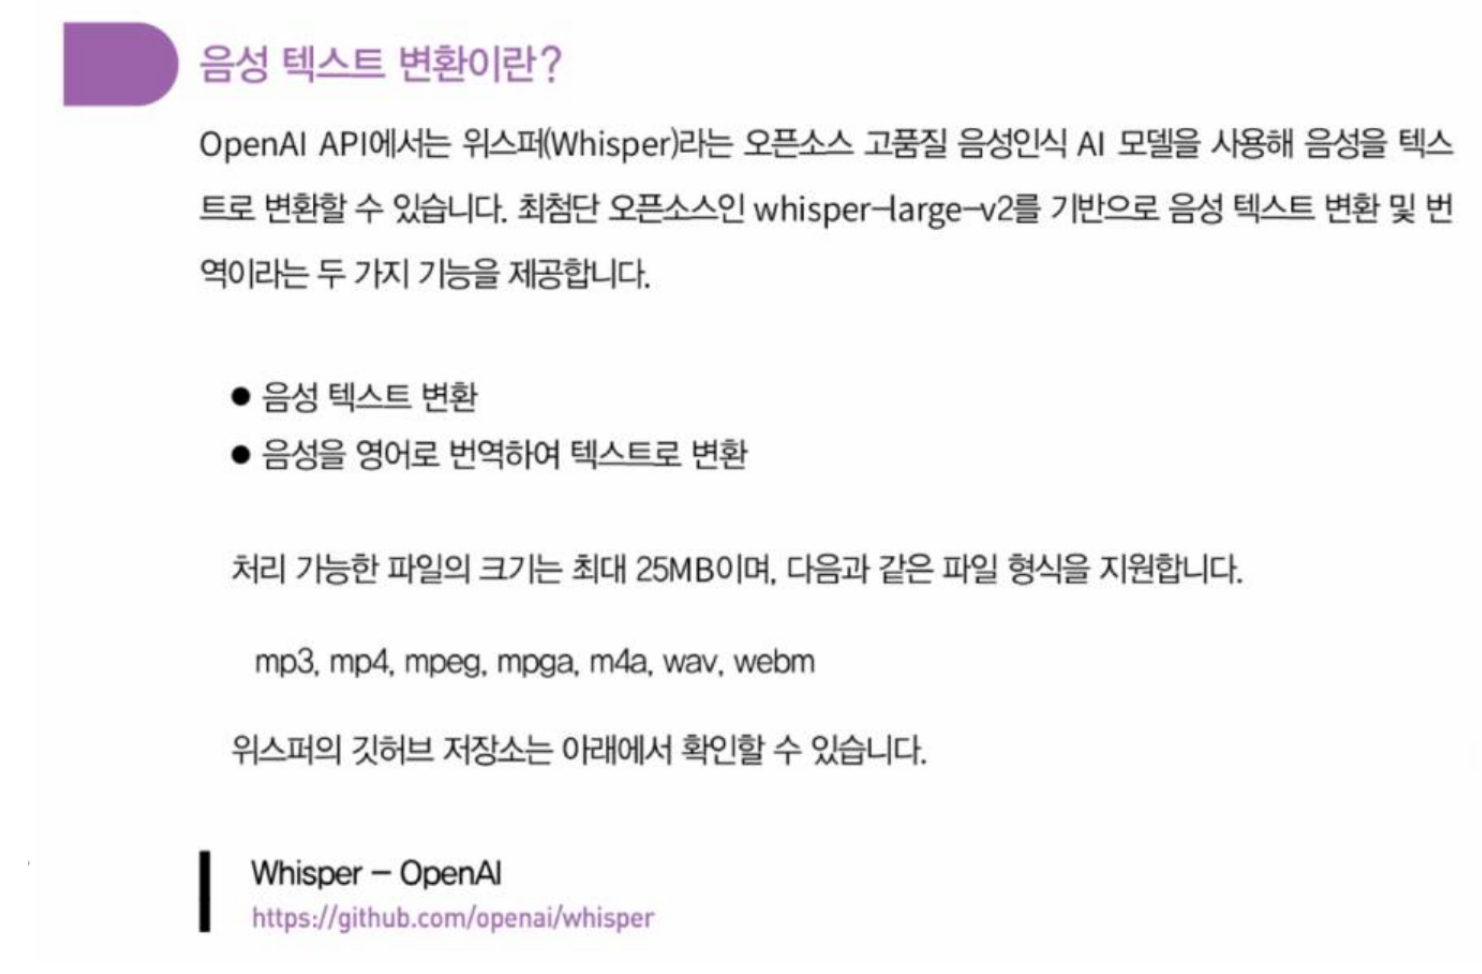

* Whisper 깃허브 저장소 : https://github.com/openai/whisper
* Speech to text (OpenAI 공식 문서) : https://platform.openai.com/docs/guides/speech-to-text
* Whisper 공식 사이트 : https://openai.com/index/whisper/

In [ ]:
from openai import OpenAI

client = OpenAI()

audio_file= open("audio.mp3", "rb")

transcription = client.audio.transcriptions.create(
    model="gpt-4o-transcribe", 
    file=audio_file, 
    # language='ko'
)

print(transcription.text)

In [ ]:
transcription

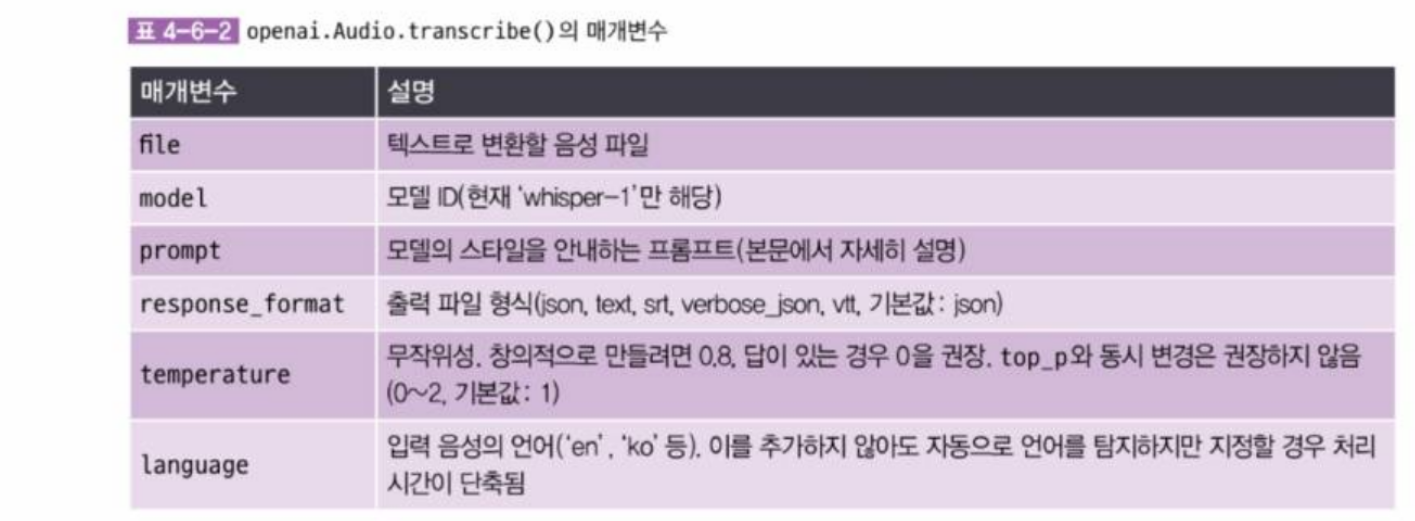


### 실습 아이디어
- 강의 녹음 파일을 텍스트로 변환한 후 ChatGPT로 요약하기
- 음성 인터뷰 내용을 자동 요약 또는 번역


## 4. 음성 번역(Audio Translation)

In [ ]:
# 음성을 영어로 번역하고 텍스트로 변환(현재 폴더에 오디오 파일을 업로드해둡니다)
# 입력언어 : 자동감지,  출력언어 : 영어(고정)

# 오디오 파일 열기
with open("audio.mp3", "rb") as audio_file:
    transcript = client.audio.translations.create(   
        model="whisper-1",
        file=audio_file
    )

# 결과 출력
print(transcript.text)  # 번역!!!


### 활용 예시
- 외국어 인터뷰 자동 번역
- 유튜브 자막 자동 생성 파이프라인 구현


## 4. 텍스트를 음성으로 변환 (읽어주기)

In [ ]:
from openai import OpenAI

client = OpenAI()

response = client.audio.speech.create(
    model="tts-1",                  # 또는 "tts-1-hd"
    voice="alloy",                  # 음성 스타일
    input="Hello! This is a test of OpenAI's text-to-speech API.",
    response_format="mp3"
)

# 파일로 저장
with open("saved_text_to_speech.mp3", "wb") as f:
    f.write(response.content)
    print("음성파일 저장 완료!")

| 모델                 | 지원 음성 스타일                                                                               | 특징 및 사용처                |
| ------------------ | --------------------------------------------------------------------------------------- | ----------------------- |
| `tts-1 / tts-1-hd` | alloy, echo, fable, onyx, nova, shimmer                                                 | 기본 영어 최적화, `hd`는 고음질    |
| `gpt-4o-mini-tts`  | alloy, echo, fable, onyx, nova, shimmer<br>+ coral, ash, ballad, sage, verse 등 (11+ 음성) | 감정, 스타일 지정 가능한 최신 음성 모델 |


In [ ]:
from openai import OpenAI

client = OpenAI()

response = client.audio.speech.create(
    model="tts-1",             # 또는 "tts-1-hd" (지원 계정 제한)
    voice="onyx",              # 다양한 스타일 가능하지만, 언어 동일 (alloy, echo, fable, onyx, nova, shimmer)
    input="안녕하세요. 생성형 AI 학습 자료입니다.",
    response_format="mp3"
)

with open("korean_tts.mp3", "wb") as f:
    f.write(response.content)

#### `gpt-4o-mini-tts` 모델 활용

In [ ]:
## 일부 음성(coral, ash, ballad, sage, verse)은 gpt-4o-mini-tts 전용으로, tts-1에서는 사용할 수 없습니다
from openai import OpenAI

client = OpenAI()

response = client.audio.speech.create(
    model="gpt-4o-mini-tts",  # 최신 모델
    voice="shimmer",           # 음성 스타일 선택
    instructions="Speak in a cheerful and positive tone.",
    input="gpt-4o-mini-tts모델을 활용한 예제입니다.",
    response_format="mp3"
)

with open("korean_tts1.mp3", "wb") as f:
    f.write(response.content)



## 5. 멀티모달 확장 아이디어
| 응용 | 설명 |
|------|------|
| 이미지 + 텍스트 | 이미지 설명 생성(Image Captioning) |
| 음성 + 텍스트 | 오디오 기반 Q&A 챗봇 |
| 이미지 + 음성 | 시각장애인용 오디오 안내 시스템 |



## 6. 실습 과제
1. 원하는 주제로 이미지를 생성하고 스타일을 3가지 이상 바꿔보세요.
2. 짧은 음성 파일을 녹음하고 텍스트로 변환한 뒤 요약해보세요.
3. 생성된 이미지를 PPT 발표 슬라이드에 적용해 보세요.



## 참고 자료
- [OpenAI Images API](https://platform.openai.com/docs/api-reference/images)
- [OpenAI Audio API](https://platform.openai.com/docs/api-reference/audio)
- [Whisper 모델 소개](https://github.com/openai/whisper)
